<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/14%EC%9E%A5/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C(14_27).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

14.27  The following data were taken from an experiment that measured the current in a wire for various imposed voltages:

 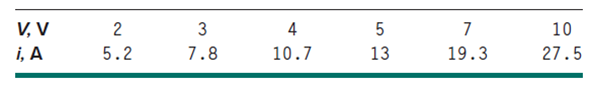

(a) On the basis of straight-line regression of the data, predict the current for a voltage of 3.5 V. Plot the model line and the data, and plot the residuals versus the predicted current values. Evaluate the fit.<br>
(b) Redo the regression with a zero intercept.

(a)

Intercept = -0.5922
Slope =   2.808
R-squared = 0.999
Standard error =  0.2702


Text(0, 0.5, 'Residual')

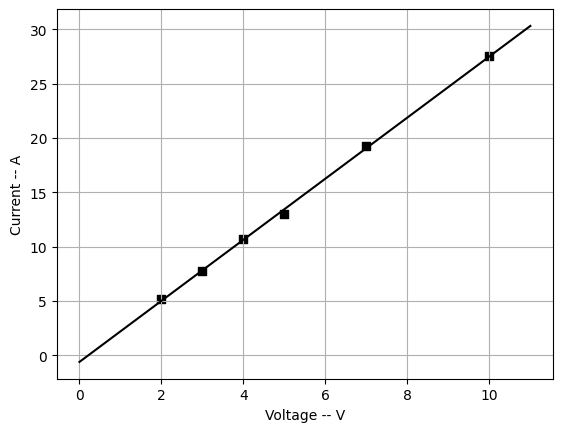

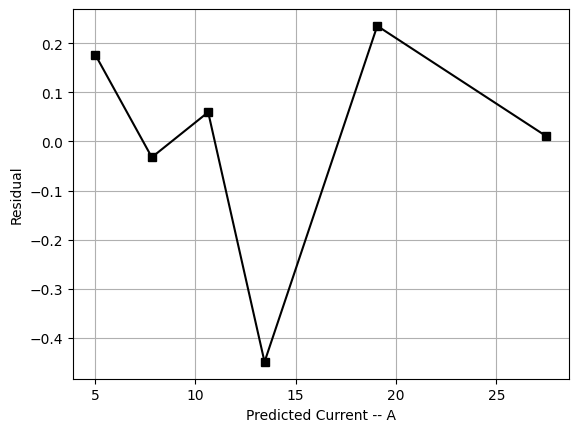

In [2]:
import numpy as np
import pylab

V = np.array([2., 3., 4., 5., 7., 10.])
I = np.array([5.2, 7.8, 10.7, 13., 19.3, 27.5])

pylab.scatter(V,I,c='k',marker='s')
pylab.grid()
pylab.xlabel('Voltage -- V')
pylab.ylabel('Current -- A')

def strlinregr(x,y):
    n = len(x)
    if len(y) != n: return 'x and y must be of same length'
    sumx = np.sum(x)
    xbar = sumx/n
    sumy = np.sum(y)
    ybar = sumy/n
    sumsqx = 0
    sumxy = 0
    for i in range(n):
        sumsqx = sumsqx + x[i]**2
        sumxy = sumxy + x[i]*y[i]
    a1 = (n*sumxy-sumx*sumy)/(n*sumsqx-sumx**2)
    a0 = ybar - a1*xbar
    e = np.zeros((n))
    SST = 0
    SSE = 0
    for i in range(n):
        e[i] = y[i] - (a0+a1*x[i])
        SST = SST + (y[i]-ybar)**2
        SSE = SSE + e[i]**2
    SSR = SST - SSE
    Rsq = SSR/SST
    SE = np.sqrt(SSE/(n-2))
    return a0,a1,Rsq,SE

a0,a1,Rsq,SE = strlinregr(V,I)
print('Intercept = {0:7.4g}'.format(a0))
print('Slope = {0:7.4g}'.format(a1))
print('R-squared = {0:5.3f}'.format(Rsq))
print('Standard error = {0:7.4g}'.format(SE))

V_plot=np.linspace(0.,11.,2)
I_plot=a0+a1*V_plot
pylab.plot(V_plot,I_plot,c='k')

Ipred = a0 + a1*V
e = I - Ipred
pylab.figure()
pylab.plot(Ipred,e,c='k',marker='s')
pylab.grid()
pylab.xlabel('Predicted Current -- A')
pylab.ylabel('Residual')


The predicted current for 3.5 V is




(b)

Slope for zero intercept case =   2.718


Text(0.5, 1.0, 'Zero Intercept Case')

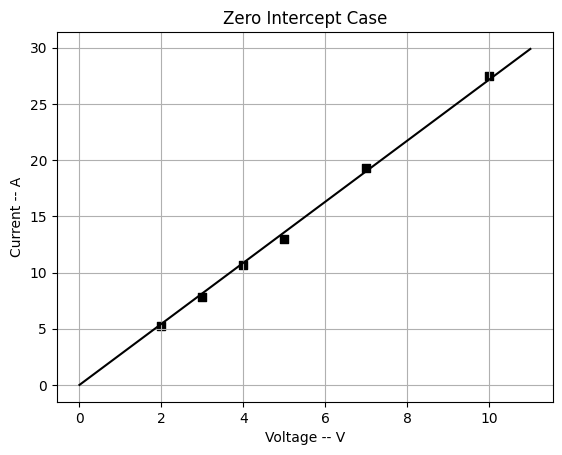

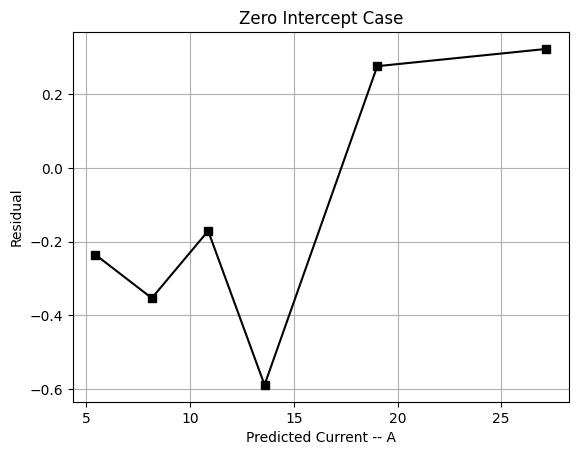

In [3]:
n = len(V)
Sxx = 0
Sxy = 0
for i in range(n):
    Sxx = Sxx + V[i]**2
    Sxy = Sxy + V[i]*I[i]
a1b = Sxy/Sxx
print('Slope for zero intercept case = {0:7.4g}'.format(a1b))

pylab.figure()
pylab.scatter(V,I,c='k',marker='s')
pylab.grid()
pylab.xlabel('Voltage -- V')
pylab.ylabel('Current -- A')
pylab.title('Zero Intercept Case')
V_plot=np.linspace(0.,11.,2)
I_plot=a1b*V_plot
pylab.plot(V_plot,I_plot,c='k')

Ipred = a1b*V
e = I - Ipred
pylab.figure()
pylab.plot(Ipred,e,c='k',marker='s')
pylab.grid()
pylab.xlabel('Predicted Current -- A')
pylab.ylabel('Residual')
pylab.title('Zero Intercept Case')



Some concern for the zero-intercept case because residuals are first negative and then transition to positive.